# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hospitalization, ICU stats
- **Historic time series data:**
    - US State testing and hospitalization, ICU stats

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [13]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

PENDING

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [14]:
jh_live_date = jh_live_global['Last_Update'][7] # The 0th item is not updated (Diamond princess) so grab one that is updated instead.
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-10-23 00:00:00')

In [15]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-10-22 00:00:00')

In [16]:
# Date to zoom in on for charting recent data
zoom_date1 = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'
zoom_date7 = '6/15/2020'
zoom_date8 = '7/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [17]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,41641309
Deaths,1136503
Recovered,28271838
Active,12232968


In [18]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(12, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,8407702,223032,3353056,4831614,2020-10-23 04:24:46,37.936303,-91.379001
India,7706946,116616,6874518,715812,2020-10-23 04:24:46,23.088275,81.806127
Brazil,5323630,155900,4526393,641337,2020-10-23 04:24:46,-12.669522,-48.480493
Russia,1453923,25072,1102564,326287,2020-10-23 04:24:46,54.546312,62.120860
Argentina,1053650,27957,851854,173839,2020-10-23 04:24:46,-38.416100,-63.616700


<AxesSubplot:title={'center':'Top Countries - Confirmed Cases Over Time'}>

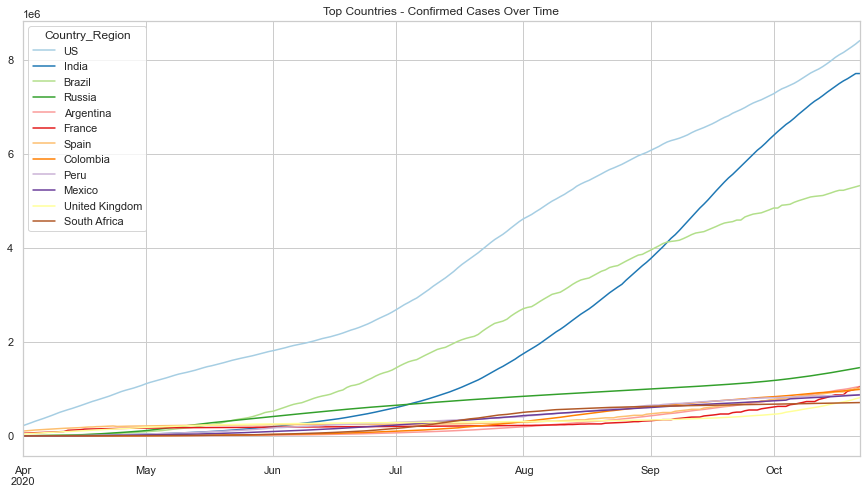

In [19]:
# Plot the top countries confirmed infections over time
jh_hist_countries_cases.loc[zoom_date2:, top_countries.index].plot(figsize=(15,8), title="Top Countries - Confirmed Cases Over Time")

### US State Level

In [20]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(12, 'Confirmed')
top_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
California,893364,17256,0,876108,2020-10-23 04:24:46,37.843962,-120.728594
Texas,871453,17659,0,853794,2020-10-23 04:24:46,31.660643,-98.653069
Florida,768091,16267,0,751824,2020-10-23 04:24:46,28.940755,-82.700744
New York,490134,33396,0,456738,2020-10-23 04:24:46,42.544151,-75.474183
Illinois,363740,9647,0,354093,2020-10-23 04:24:46,39.843618,-89.178330
Georgia,345535,7729,0,337806,2020-10-23 04:24:46,32.808532,-83.577430
North Carolina,252992,4082,0,248910,2020-10-23 04:24:46,35.624210,-79.501099
Tennessee,237907,3011,0,234896,2020-10-23 04:24:46,35.885102,-86.108723
Arizona,234906,5859,0,229047,2020-10-23 04:24:46,33.675904,-111.463232


<AxesSubplot:title={'center':'Confirmed Cases - Top US States'}>

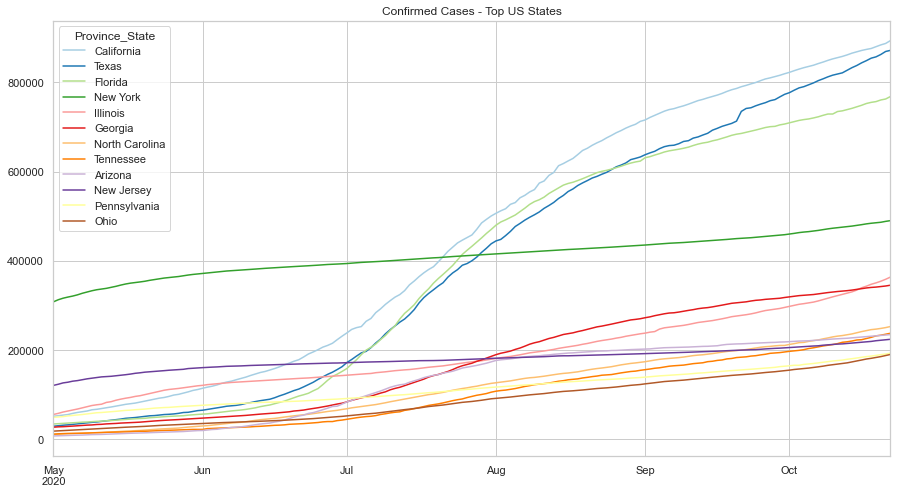

In [21]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date4:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States'}>

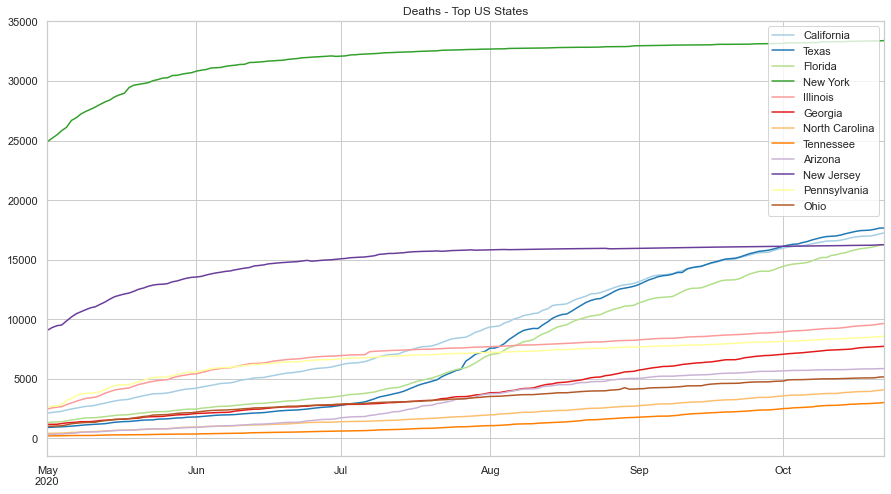

In [22]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, :].plot(title='Deaths - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States (ex NY)'}>

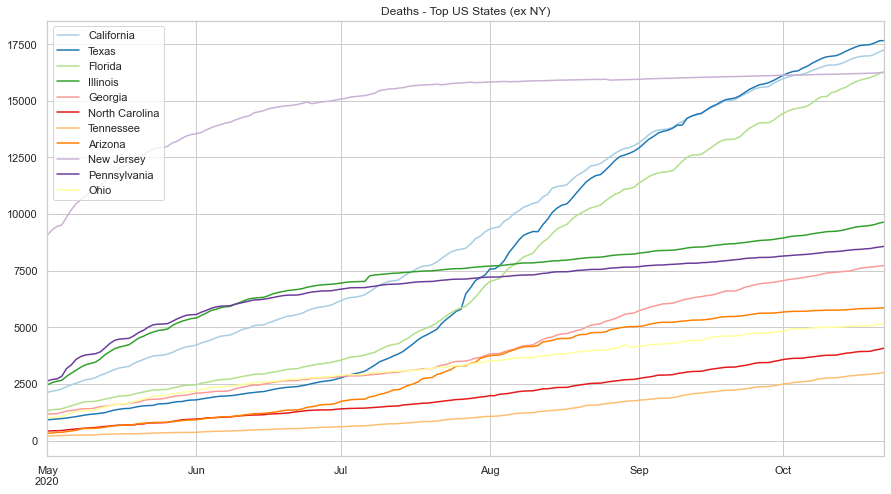

In [23]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [24]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(12, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,30656,2240,0,28416,2020-10-23 04:24:46,42.486077,-71.390492,25017.0
Suffolk,26954,1166,0,25788,2020-10-23 04:24:46,42.327951,-71.078504,25025.0
Essex,22596,1333,0,21263,2020-10-23 04:24:46,42.668763,-70.946872,25009.0
Worcester,15778,1156,0,14622,2020-10-23 04:24:46,42.350270,-71.904934,25027.0
Norfolk,11336,1097,0,10239,2020-10-23 04:24:46,42.160731,-71.205304,25021.0


<AxesSubplot:title={'center':'Confirmed Cases - Top MA Counties'}>

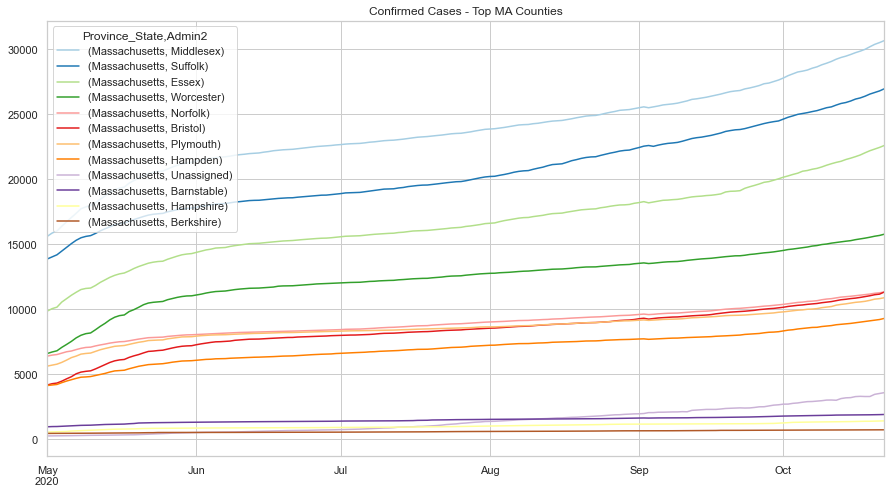

In [25]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top MA Counties'}>

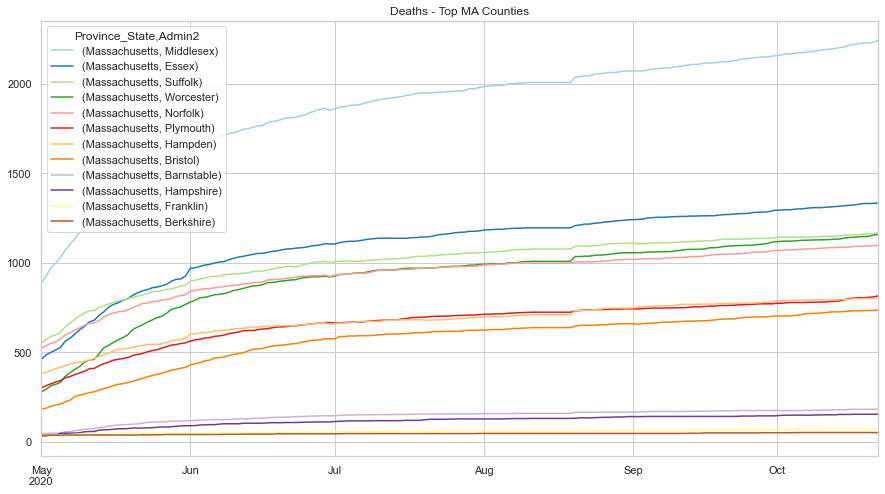

In [26]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [27]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(12, 'Confirmed')
top_counties_CA.head(5)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,294065,6956,0,287109,2020-10-23 04:24:46,34.308284,-118.228241,6037.0
Riverside,65386,1279,0,64107,2020-10-23 04:24:46,33.743150,-115.993358,6065.0
San Bernardino,61550,1070,0,60480,2020-10-23 04:24:46,34.840603,-116.177469,6071.0
Orange,57848,1434,0,56414,2020-10-23 04:24:46,33.701475,-117.764600,6059.0
San Diego,53498,866,0,52632,2020-10-23 04:24:46,33.034846,-116.736533,6073.0


<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties'}>

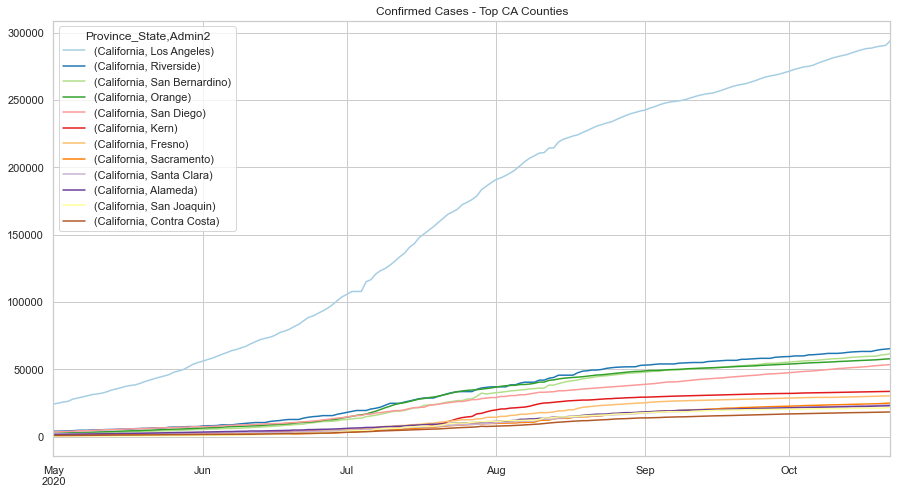

In [28]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(12).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties (excl Los Angeles)'}>

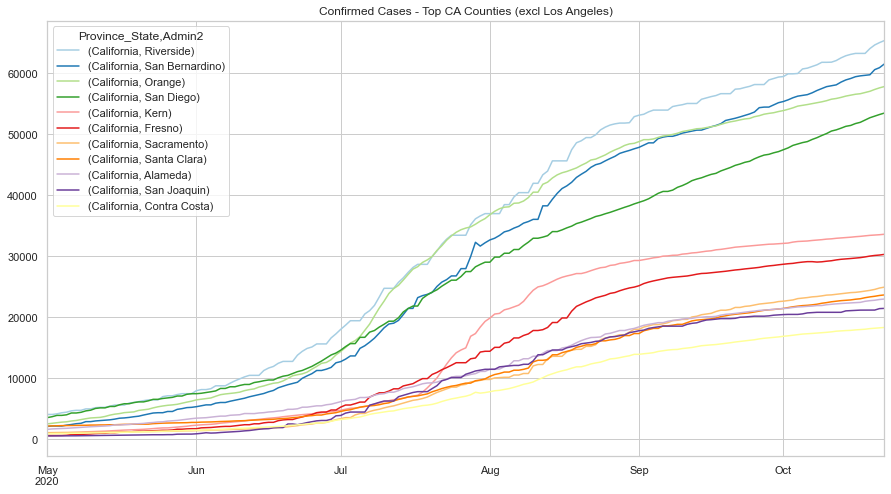

In [29]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties'}>

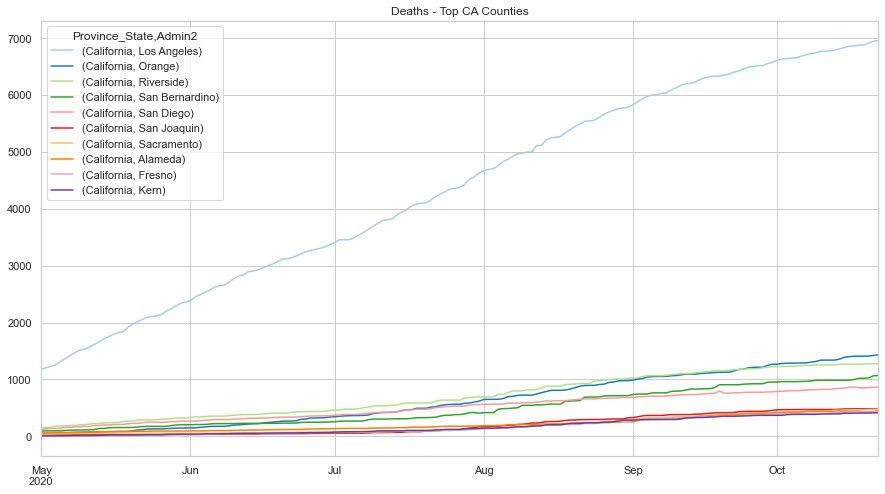

In [30]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(10).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties (excl Los Angeles)'}>

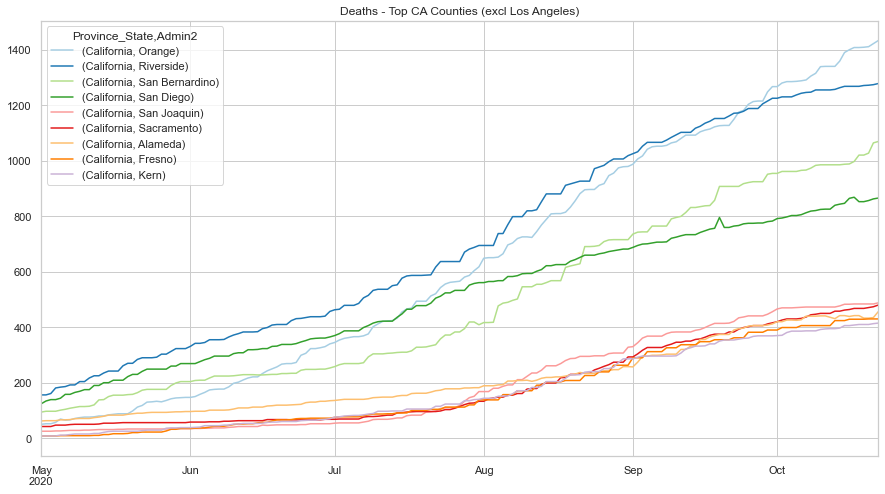

In [31]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [32]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [33]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [34]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [35]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [36]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",57848,1434,0,56414,2020-10-23 04:24:46,33.701475,-117.764600
"(Massachusetts, Middlesex)",30656,2240,0,28416,2020-10-23 04:24:46,42.486077,-71.390492
"(Massachusetts, Suffolk)",26954,1166,0,25788,2020-10-23 04:24:46,42.327951,-71.078504
"(Massachusetts, Essex)",22596,1333,0,21263,2020-10-23 04:24:46,42.668763,-70.946872
"(Massachusetts, Bristol)",11334,735,0,10599,2020-10-23 04:24:46,41.792284,-71.108722
Costa Rica,100616,1251,61162,38203,2020-10-23 04:24:46,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [37]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [38]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [39]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                        Costa Rica
Admin2             Orange     Middlesex Suffolk  Essex Bristol           
2020-10-15          56436         29587   26012  21619   10828      93152
2020-10-16          56587         29728   26160  21736   10864      94348
2020-10-17          56672         29845   26250  21865   10919      95514
2020-10-18          56868         29986   26383  22035   10985      95514
2020-10-19          57071         30182   26546  22192   11046      97075
2020-10-20          57373         30367   26663  22315   11126      97922
2020-10-21          57635         30502   26787  22446   11170      99425
2020-10-22          57848         30656   26954  22596   11334     100616

In [40]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Confirmed Cases - Counties of Friends & Family'}>

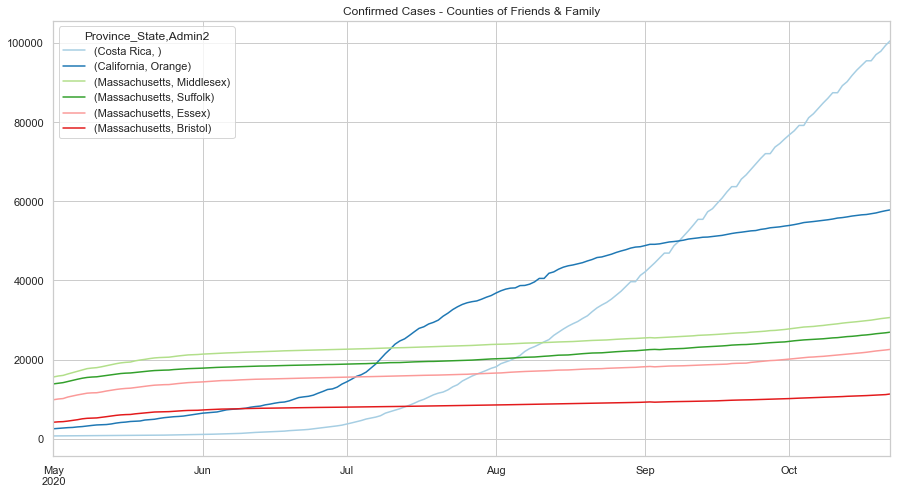

In [41]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date4:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [42]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [43]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [44]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [45]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-10-15           1391          2205    1153  1318     727          5   
2020-10-16           1401          2214    1155  1320     729          5   
2020-10-17           1409          2219    1156  1322     731          5   
2020-10-18           1409          2223    1156  1326     731          5   
2020-10-19           1410          2226    1160  1330     732          5   
2020-10-20           1412          2226    1161  1330     732          5   
2020-10-21           1423          2232    1163  1331     733          5   
2020-10-22           1434          2240    1166  1333     735          5   

Province_State Costa Rica  
Admin2                     
2020-10-15           1159  
2020-10-16           1168  
2020-10-17           1183  
2020-10-18           1183  
2020-10-19           1204  
2020-10-20           1222  
2020-10-21           1236  
2020-10-22           1251

In [46]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Deaths - Counties of Friends & Family'}>

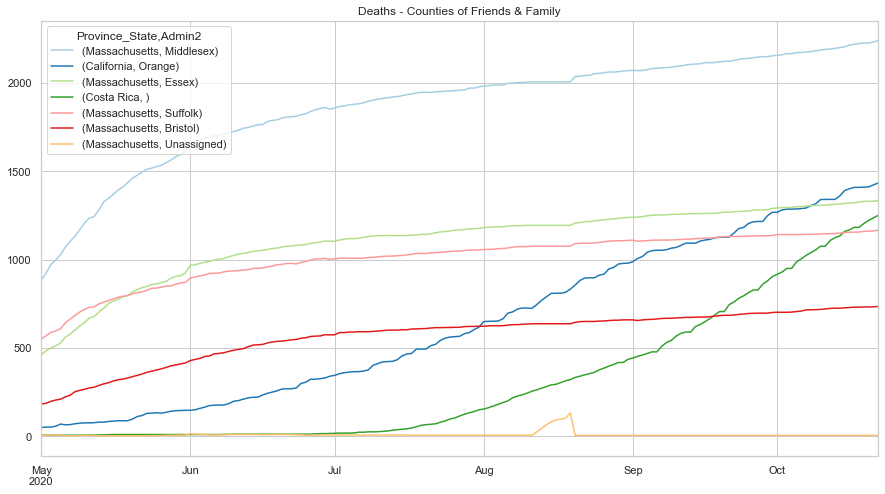

In [47]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date4:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))